# Preprocessing of tha data for later use in Machine Learning applications

In [2]:
# Installing the required packages 
pip install  -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
import warnings
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

## Running the code on the original uncleaned data as input

In [4]:
# Reading the Toxicity data as a pandas DataFrame
chem_df = pd.read_csv("data.csv")
display(chem_df)

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


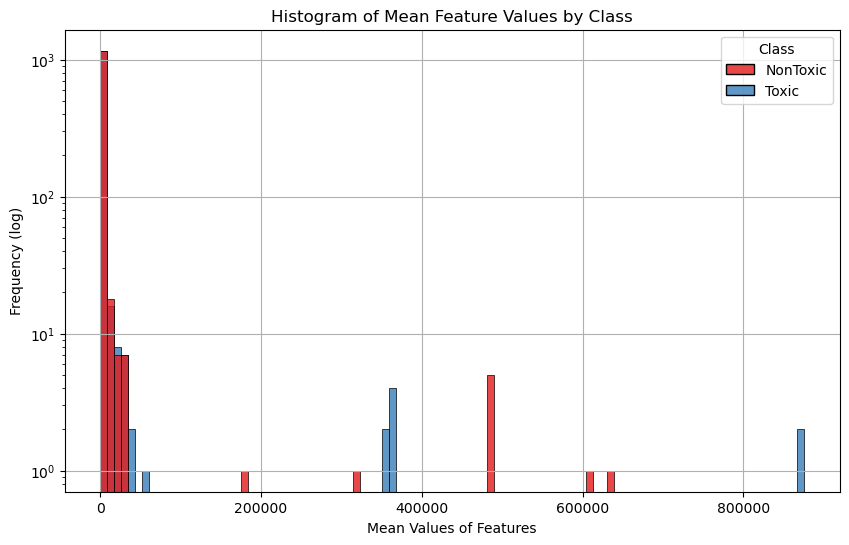

In [5]:
# Calculate the mean of each feature grouped by class
means_by_class = chem_df.groupby('Class').mean()
# Melt the DataFrame for easier plotting
means_melted = means_by_class.reset_index().melt(id_vars='Class', var_name='feature', value_name='mean_value')
# Plot the histogram of mean values for each class
plt.figure(figsize=(10, 6))
sns.histplot(data=means_melted, x='mean_value', hue='Class', bins=100, alpha=0.8, palette='Set1')
# Add labels and title
plt.xlabel('Mean Values of Features')
plt.ylabel('Frequency (log)')
plt.yscale('log')
plt.title('Histogram of Mean Feature Values by Class')
plt.grid(True)
plt.show()

In [6]:
# Checking inconsistencies in the data using the check_data_quality() function
data_quality = check_data_quality(chem_df, 'Class')
display(data_quality)

No missing values found.

No duplicate rows found.

No non-numeric entries found.

Classes found: [['NonToxic', 'Toxic']]

No inconsistent decimal separators found.



{'Classes':   Target     Unique Entries
 0  Class  [NonToxic, Toxic]}

In [7]:
# Calculating statistics for each feature using the calculate_feature_statistics() function
feature_stats = calculate_feature_statistics(chem_df)
display(feature_stats)

,Feature,Mean,Range,IQR,MAD,Variance,SD,Number of Zeros,Percentage of Zeros
0,MATS3v,-0.031244,0.4526,0.07155,0.0368,0.004040,0.063559,0,0.000000
1,nHBint10,0.315789,4.0000,0.00000,0.0000,0.582043,0.762918,139,81.286550
2,MATS3s,-0.001001,0.4027,0.06500,0.0332,0.004087,0.063928,0,0.000000
3,MATS3p,-0.061501,0.4775,0.08245,0.0416,0.005313,0.072891,0,0.000000
4,nHBDon_Lipinski,0.994152,6.0000,2.00000,1.0000,1.229377,1.108773,73,42.690058
...,...,...,...,...,...,...,...,...,...
1198,ETA_EtaP_B,0.011316,0.0332,0.00635,0.0032,0.000030,0.005482,0,0.000000
1199,nT5Ring,1.467836,5.0000,1.00000,1.0000,1.026901,1.013361,32,18.713450
1200,SHdNH,0.004820,0.4292,0.00000,0.0000,0.001978,0.044475,169,98.830409
1201,ETA_dEpsilon_C,-0.085088,0.1954,0.03315,0.0168,0.000857,0.029273,0,0.000000


In [8]:
# Remove all features that contain more than 70% zeros
chem_df = chem_df.loc[:, (chem_df == 0).sum() <= len(chem_df)*0.7]

In [7]:
# Save the cleaned data
chem_df.to_csv('data_cleaned.csv', index=False)

## Artificially Introducing errors to the data and running the code

In [9]:
chem_df = pd.read_csv('data.csv')
display(chem_df)

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


In [10]:
# Introduce errors into the dataframe using the corrupt_dataframe() function
chem_error = corrupt_dataframe(chem_df)
# Extract the features and target values as dataframes
features = chem_error.drop(columns=['Class'])
target = pd.DataFrame(chem_error['Class'])
# Checking inconsistencies in the data using the check_data_quality() function
data_quality = check_data_quality(chem_error, 'Class')

Missing Values found: 982

Duplicate Rows found: 8

Non-Numeric Entries found: 2140

Classes found: [['NonToxic', 'cxNTxNTT', 'Toxic', nan]]

No inconsistent decimal separators found.



In [11]:
# Remove duplicate rows
chem_error = chem_error.drop_duplicates()
# Replace commas with points
chem_error = chem_error.replace(',', '.')
# Replace all non-numeric feature values into NaN 
chem_error[features.columns] = chem_error[features.columns].apply(pd.to_numeric, errors='coerce')
# Hande missing values by specifying the method, here 'drop' to drop all missing values
chem_error[features.columns] = chem_error[features.columns].fillna(chem_error[features.columns].median())
# Remove remaining NaN values from the class column
chem_error = chem_error.dropna()
# Filter the DataFrame to only include rows where the 'Class' column is 'Toxic' or 'NonToxic'
chem_error = chem_error[chem_error['Class'].isin(['Toxic', 'NonToxic'])]
# Checking inconsistencies in the data using the check_data_quality() function
data_quality = check_data_quality(chem_error, 'Class')



No missing values found.

No duplicate rows found.

No non-numeric entries found.

Classes found: [['NonToxic', 'Toxic']]

No inconsistent decimal separators found.



In [10]:
# Calculating statistics for each feature using the calculate_feature_statistics() function
feature_stats = calculate_feature_statistics(chem_error)
display(feature_stats)

,Feature,Mean,Range,IQR,MAD,Variance,SD,Number of Zeros,Percentage of Zeros
0,MATS3v,-0.032191,0.4526,0.066400,0.03370,0.003879,0.062284,0,0.000000
1,MATS3s,-0.000070,0.3886,0.062475,0.03185,0.003870,0.062208,0,0.000000
2,MATS3p,-0.062288,0.4775,0.078075,0.03950,0.005081,0.071282,0,0.000000
3,nHBDon_Lipinski,0.988095,6.0000,2.000000,1.00000,1.209438,1.099745,70,41.666667
4,MATS3e,-0.024961,0.4614,0.066400,0.03275,0.006179,0.078604,0,0.000000
...,...,...,...,...,...,...,...,...,...
971,ETA_EtaP_L,0.202994,0.1074,0.035500,0.01770,0.000577,0.024028,0,0.000000
972,ETA_EtaP_F,1.237132,0.7373,0.166375,0.08440,0.017695,0.133021,0,0.000000
973,ETA_EtaP_B,0.011265,0.0332,0.006225,0.00310,0.000029,0.005424,0,0.000000
974,nT5Ring,1.470238,5.0000,1.000000,1.00000,1.029049,1.014421,31,18.452381


In [9]:
# Remove all features that contain more than 70% zeros
chem_error = chem_error.loc[:, (chem_error == 0).sum() <= len(chem_error)*0.7]
display(chem_error)

,MATS3v,MATS3s,MATS3p,nHBDon_Lipinski,MATS3e,MATS3c,minHBint2,MATS3m,MATS3i,VR3_Dt,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,ETA_dEpsilon_C,Class
0,0.0908,0.0075,0.0173,0.0,-0.0436,0.0409,0.0000,0.1368,-0.0574,31.8800,...,0.0000,0.0000,0.0000,0.0000,0.1780,1.5488,0.0088,0.0,-0.0868,NonToxic
1,0.0213,0.1144,-0.0410,0.0,0.1231,-0.0316,0.0000,0.1318,-0.0715,28.2796,...,2.1204,28.2185,8.8660,19.3525,0.1739,1.3718,0.0048,2.0,-0.0810,NonToxic
2,0.0018,-0.0156,-0.0765,2.0,-0.1138,-0.1791,0.0000,0.0615,-0.2185,66.8884,...,2.0850,33.1064,5.2267,27.8796,0.1688,1.4395,0.0116,2.0,-0.1004,NonToxic
3,-0.0251,-0.0064,-0.0894,3.0,-0.0747,-0.1151,0.0000,0.0361,-0.2025,34.2573,...,2.0797,32.5232,7.7896,24.7336,0.1702,1.2388,0.0133,2.0,-0.1010,NonToxic
4,0.0135,0.0424,-0.0353,0.0,-0.0638,0.0307,0.0000,0.0306,-0.0871,25.7867,...,2.1092,32.0726,12.3240,19.7486,0.1789,1.4495,0.0120,2.0,-0.1071,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0338,-0.0478,-0.0840,2.0,-0.0739,-0.2315,1.5660,-0.1133,0.0243,8.3016,...,2.0635,14.5864,2.5690,12.0174,0.1648,0.9710,0.0049,1.0,-0.0952,NonToxic
167,-0.0064,-0.1222,0.0013,1.0,-0.1873,-0.2181,5.5404,-0.0757,0.0002,21.1175,...,2.0767,17.2731,10.7860,6.4871,0.1805,1.2298,0.0127,1.0,-0.0860,NonToxic
168,0.0096,-0.0020,0.0058,1.0,-0.1293,-0.0979,5.3976,0.0409,-0.0675,21.0730,...,2.0754,27.3742,4.9930,19.2864,0.2089,1.1245,0.0093,1.0,-0.0927,NonToxic
169,-0.0736,-0.1267,-0.0345,2.0,-0.0361,0.0151,5.5190,-0.1025,0.0525,22.6406,...,2.0573,30.2493,10.7504,19.4989,0.1944,1.2256,0.0167,1.0,-0.1129,Toxic


In [11]:
# Save the cleaned data
chem_error.to_csv('data_error_cleaned.csv', index=False)